Preprossin Data

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [2]:
df = pd.read_csv('/home/mm/code/Reem24Alamri/hospitai/raw_data/healthcare_prediction_dataset (1).csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.shape

(55500, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
df.describe()  # Descriptive statistics for numerical features

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.duplicated().sum()

534

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending=False)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [23]:
df = df[df['Billing Amount'] > 0]

In [24]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood Type          54860 non-null  object        
 4   Medical Condition   54860 non-null  object        
 5   Date of Admission   54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance Provider  54860 non-null  object        
 9   Billing Amount      54860 non-null  float64       
 10  Room Number         54860 non-null  int64         
 11  Admission Type      54860 non-null  object        
 12  Discharge Date      54860 non-null  datetime64[ns]
 13  Medication          54860 non-null  object    

In [25]:
df['StayDuration'] = ((df['Discharge Date'] - df['Date of Admission'])).dt.days
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,StayDuration
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [26]:
data = df.drop(['Name','Doctor','Hospital','Room Number', 'Date of Admission', 'Discharge Date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54860 non-null  int64  
 1   Gender              54860 non-null  object 
 2   Blood Type          54860 non-null  object 
 3   Medical Condition   54860 non-null  object 
 4   Insurance Provider  54860 non-null  object 
 5   Billing Amount      54860 non-null  float64
 6   Admission Type      54860 non-null  object 
 7   Medication          54860 non-null  object 
 8   Test Results        54860 non-null  object 
 9   StayDuration        54860 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 4.6+ MB


In [27]:
X = df.drop(columns='StayDuration')
y = df['StayDuration']

In [28]:
X = pd.get_dummies(data,
                   columns=[
                       'Gender',
                       'Blood Type',
                       'Medical Condition',
                       'Test Results',
                       'Admission Type',
                       'Medication',
                       'Insurance Provider'])
X

,Age,Billing Amount,StayDuration,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,30,18856.281306,2,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,62,33643.327287,6,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,76,27955.096079,15,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,28,37909.782410,30,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,43,14238.317814,20,1,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,2650.714952,30,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
55496,61,31457.797307,9,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
55497,38,27620.764717,28,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
55498,43,32451.092358,6,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


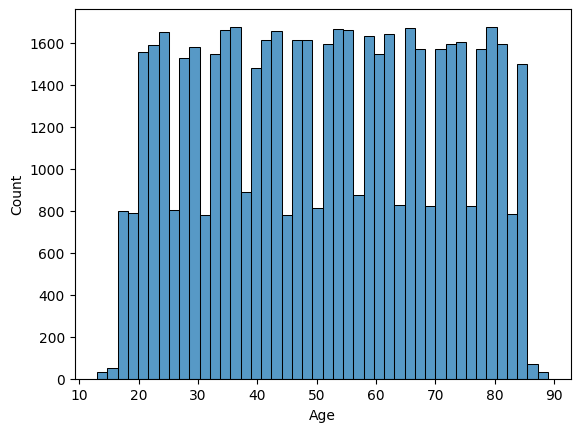

In [29]:
sns.histplot(X['Age']);

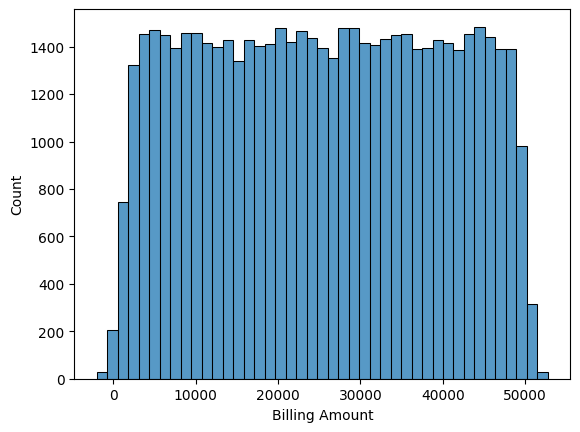

In [21]:
sns.histplot(X['Billing Amount']);

In [22]:
minmax = MinMaxScaler()

,Age,Billing Amount,StayDuration,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
132,32,-502.507813,18,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
799,49,-1018.245371,21,1,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1018,60,-306.364925,21,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1421,74,-109.097122,20,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2103,72,-576.727907,27,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52213,74,-1310.272895,10,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
52629,66,-676.852502,23,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
53204,55,-306.364925,21,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
53232,68,-591.917419,2,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [36]:
data.head()

,Age,Insurance Provider,Billing Amount,StayDuration,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,Blue Cross,18856.281306,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,62,Medicare,33643.327287,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,76,Aetna,27955.096079,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
3,28,Medicare,37909.782410,30,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
4,43,Aetna,14238.317814,20,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [37]:
unique_counts = data.nunique()
print(unique_counts)

Age                                  77
Insurance Provider                    5
Billing Amount                    50000
StayDuration                         30
Gender_Female                         2
Gender_Male                           2
Blood Type_A+                         2
Blood Type_A-                         2
Blood Type_AB+                        2
Blood Type_AB-                        2
Blood Type_B+                         2
Blood Type_B-                         2
Blood Type_O+                         2
Blood Type_O-                         2
Medical Condition_Arthritis           2
Medical Condition_Asthma              2
Medical Condition_Cancer              2
Medical Condition_Diabetes            2
Medical Condition_Hypertension        2
Medical Condition_Obesity             2
Test Results_Abnormal                 2
Test Results_Inconclusive             2
Test Results_Normal                   2
Admission Type_Elective               2
Admission Type_Emergency              2


In [38]:
data.head()

,Age,Insurance Provider,Billing Amount,StayDuration,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Arthritis,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,Blue Cross,18856.281306,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,62,Medicare,33643.327287,6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,76,Aetna,27955.096079,15,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
3,28,Medicare,37909.782410,30,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
4,43,Aetna,14238.317814,20,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54966 entries, 0 to 55499
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             54966 non-null  int64  
 1   Insurance Provider              54966 non-null  object 
 2   Billing Amount                  54966 non-null  float64
 3   StayDuration                    54966 non-null  int64  
 4   Gender_Female                   54966 non-null  uint8  
 5   Gender_Male                     54966 non-null  uint8  
 6   Blood Type_A+                   54966 non-null  uint8  
 7   Blood Type_A-                   54966 non-null  uint8  
 8   Blood Type_AB+                  54966 non-null  uint8  
 9   Blood Type_AB-                  54966 non-null  uint8  
 10  Blood Type_B+                   54966 non-null  uint8  
 11  Blood Type_B-                   54966 non-null  uint8  
 12  Blood Type_O+                   

In [40]:
data.columns

Index(['Age', 'Insurance Provider', 'Billing Amount', 'StayDuration',
       'Gender_Female', 'Gender_Male', 'Blood Type_A+', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Test Results_Abnormal',
       'Test Results_Inconclusive', 'Test Results_Normal',
       'Admission Type_Elective', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Aspirin', 'Medication_Ibuprofen',
       'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')

In [41]:
X = data.drop(['StayDuration','Insurance Provider','Billing Amount'], axis=1)
y = data['StayDuration']

In [42]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)
y_pred

array([14.543     , 13.78541667, 15.59833333, ..., 20.108     ,
       15.58666667, 13.83166667])

In [43]:
# from sklearn.model_selection import cross_validate
cv_results = cross_validate(RandomForestRegressor(random_state=42), X_train, y_train, cv=5, scoring='r2')
cv_results

{'fit_time': array([8.54124546, 8.83199096, 8.4002645 , 8.17779851, 8.31673288]),
 'score_time': array([0.18935442, 0.19743824, 0.17051244, 0.16859412, 0.22447896]),
 'test_score': array([-0.10372925, -0.1183339 , -0.11409109, -0.09624972, -0.11659139])}

In [30]:
X_train

NameError: name 'X_train' is not defined